# Unemployment Analysis With Python

In [14]:
# import necessary libraries
import pandas as pd
import seaborn  as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [3]:
# read the data
df = pd.read_csv("D:/Unemployment in India.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
# shape of the dataset
df.shape

(768, 7)

In [5]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [6]:
# columns of the dataset
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [7]:
# checking for duplicate values
df.duplicated().sum()

27

In [8]:
# removing duplicate values
df.drop_duplicates(inplace = True)
df.shape

(741, 7)

In [9]:
# checking for null values
df.isnull().sum()

Region                                      1
 Date                                       1
 Frequency                                  1
 Estimated Unemployment Rate (%)            1
 Estimated Employed                         1
 Estimated Labour Participation Rate (%)    1
Area                                        1
dtype: int64

In [10]:
# removing null values
df.dropna(inplace = True)
df.shape

(740, 7)

In [11]:
# univariate analysis
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


# Average Estimated Unemployment Rate (%) : 11.787946

<Axes: >

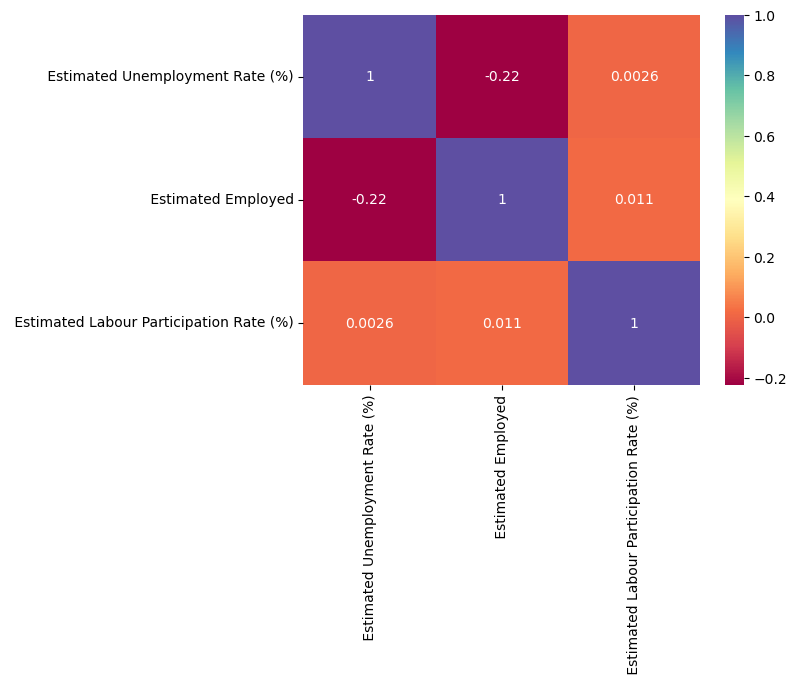

In [12]:
# correlation analysis of numerical variables
features = [' Estimated Unemployment Rate (%)',' Estimated Employed',' Estimated Labour Participation Rate (%)']
corr_matrix = df[features].corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'Spectral')


# From the heatmap, it is observed that estimated unemployment rate and estimated employed has a negative correlation which implies during Covid-19, less people got employment opportunity as there is a sharp increase in the unemployment rate.

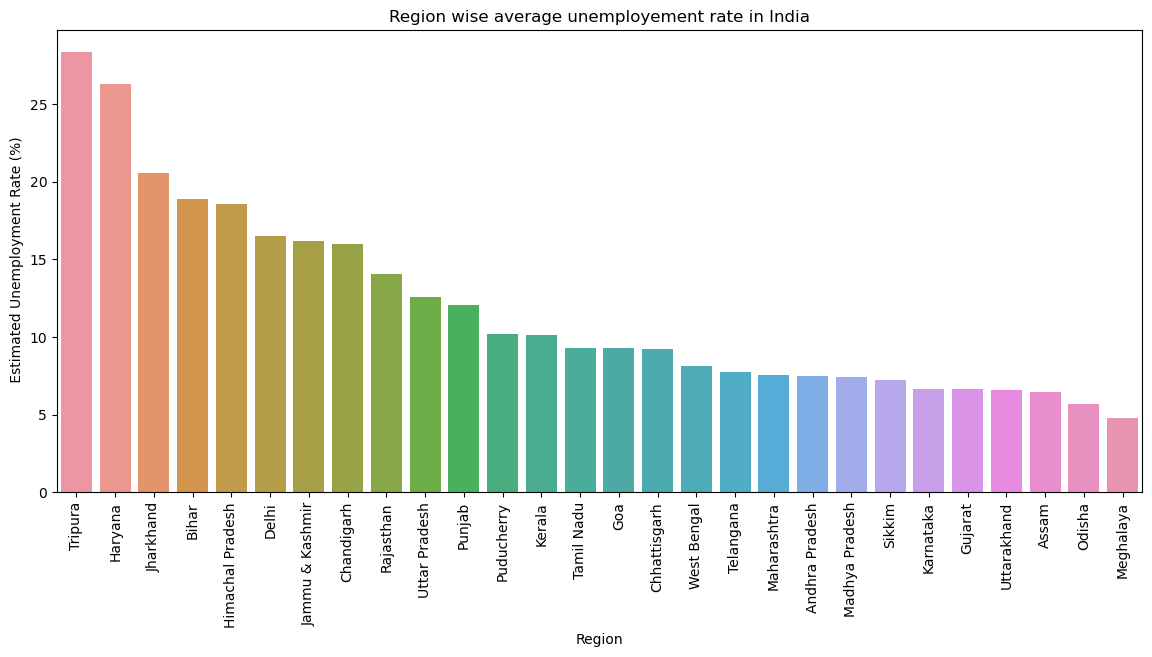

In [13]:
# region wise average unemployement rate
avg = df.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().reset_index()
avg_sort = avg.sort_values(by=' Estimated Unemployment Rate (%)', ascending= False)
plt.figure(figsize=(14,6))
sns.barplot(x ='Region',y =' Estimated Unemployment Rate (%)',data = avg_sort)
plt.title('Region wise average unemployement rate in India')
plt.xticks(rotation=90)
plt.show()

# From the bar graph, it is observed that Tripura recorded the highest unemployment rate with an average of approximately 28% followed by Haryana, Jharkhand, Bihar, Himachal Pradesh, Delhi etc. 
# Regions Goa and Tamil Nadu has unemployment rate of approx. 10% whereas Maharashtra, Andhra Pradesh and Madhya Pradesh has unemployment rate of less than 10% and Karnataka, Gujarat and Uttarakhand has unemployment rate of more than 5%.
# Meghalaya being the only region whose unemployment rate is approx.5% during the pandemic.

In [31]:
# Region and Area wise average unemployment rate
data = df[['Region', 'Area', ' Estimated Unemployment Rate (%)']]
fig = px.sunburst(data, path = ['Region', 'Area'],
                 values = ' Estimated Unemployment Rate (%)', width = 900, height = 600,
                 title = 'Unemployment rate in India')
fig.show()

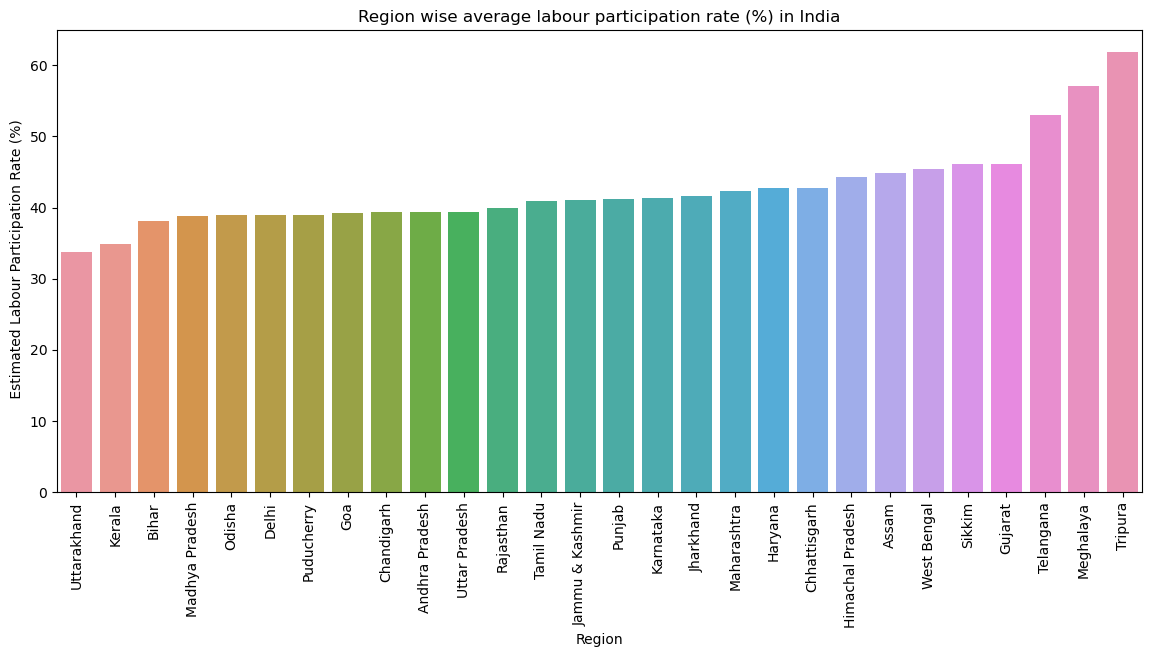

In [17]:
# region wise average labour participation rate
avg = df.groupby('Region')[' Estimated Labour Participation Rate (%)'].mean().reset_index()
avg_sort = avg.sort_values(by=' Estimated Labour Participation Rate (%)', ascending= True)
plt.figure(figsize=(14,6))
sns.barplot(x ='Region',y =' Estimated Labour Participation Rate (%)',data = avg_sort)
plt.title('Region wise average labour participation rate (%) in India')
plt.xticks(rotation=90)
plt.show()

# It is observed that labour participation rate is highest in Tripura while it is lowest in Uttarakhand.

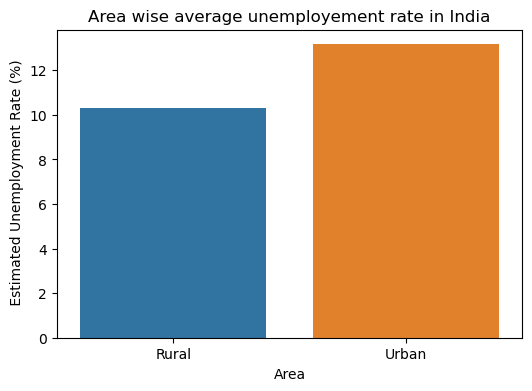

In [15]:
# Average Unemployment rate in rural and urban areas
avgg = df.groupby('Area')[' Estimated Unemployment Rate (%)'].mean().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(x ='Area',y =' Estimated Unemployment Rate (%)',data = avgg)
plt.title('Area wise average unemployement rate in India')
plt.show()

# It is observed that during Covid-19, Urban area witnessed more rates of unemployment than Rural area.

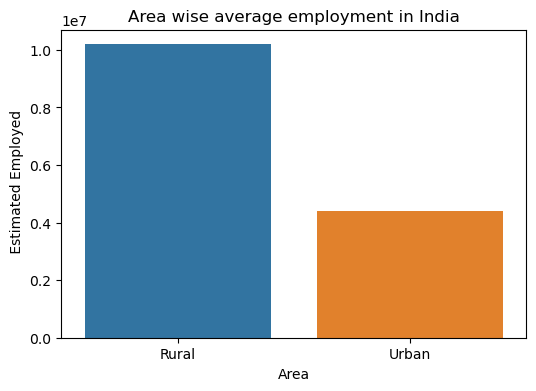

In [16]:
# Average employment in rural and urban areas
avgg = df.groupby('Area')[' Estimated Employed'].mean().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(x ='Area',y =' Estimated Employed',data = avgg)
plt.title('Area wise average employment in India')
plt.show()

# It is observed that during the pandemic, more people from rural areas got employment opportunity than urban areas.

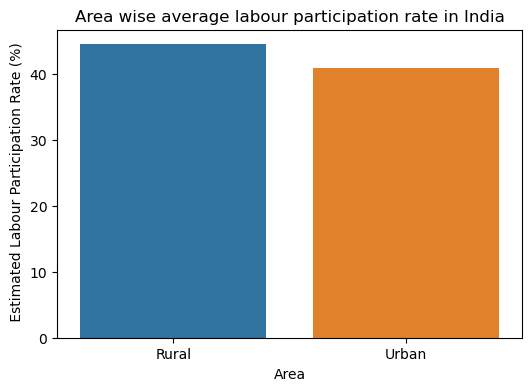

In [21]:
# Average labour participation rate in rural and urban areas
avgg = df.groupby('Area')[' Estimated Labour Participation Rate (%)'].mean().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(x ='Area',y =' Estimated Labour Participation Rate (%)',data = avgg)
plt.title('Area wise average labour participation rate in India')
plt.show()

# It is observed that labour participation rate is more in rural areas than urban areas.

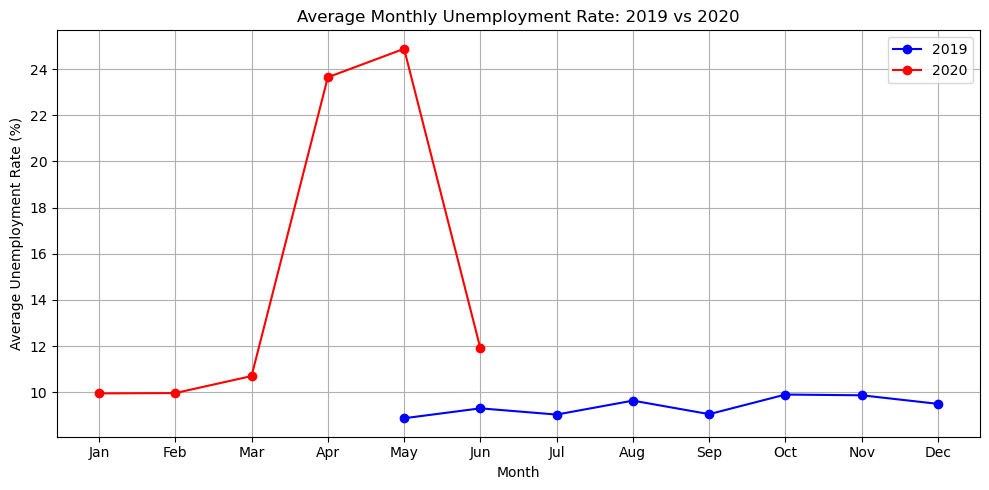

In [29]:
# Unemployment rate over time (2019 vs 2020)
df[' Date'] = pd.to_datetime(df[' Date'])
df_19 = df[df[' Date'].dt.year == 2019]
df_20 = df[df[' Date'].dt.year == 2020]
avg_2019 = df_19.groupby(df_19[' Date'].dt.month)[' Estimated Unemployment Rate (%)'].mean()
avg_2020 = df_20.groupby(df_20[' Date'].dt.month)[' Estimated Unemployment Rate (%)'].mean()
plt.figure(figsize=(10, 5))
plt.plot(avg_2019.index, avg_2019, marker='o', linestyle='-', color='blue', label='2019')
plt.plot(avg_2020.index, avg_2020, marker='o', linestyle='-', color='red', label='2020')
plt.title('Average Monthly Unemployment Rate: 2019 vs 2020')
plt.xlabel('Month')
plt.ylabel('Average Unemployment Rate (%)')
plt.grid(True)
plt.legend()
plt.xticks(range(1, 12+1), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

# From the graph, it is observed that before the pandemic in 2019, average unemployment rate was below 10% from May to Dec whereas during the pandemic in 2020, unemployment rate increased from 11% to 25% from March to May and then it is decreased to 12% during the month of June.